In [1]:
import time
import numpy as np
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics.pairwise import cosine_similarity
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization
from sklearn.linear_model import LinearRegression
from collections import OrderedDict
import sys
sys.path.append('../../')
from lvxnn.LVXNN import LV_XNN
from lvxnn.DataReader import data_initialize
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
data= pd.read_csv('train.csv')
train, test = train_test_split(data, test_size = 0.2)


list1 = train.columns
meta_info = OrderedDict()
for i in list1:
    meta_info[i]={'type': 'categorical','source':'user'}
meta_info['income']={"type":"continues",'source':'user'}
meta_info['cust_seniority']={"type":"continues",'source':'user'}
meta_info['age'] = {"type":"continues",'source':'user'}
meta_info['item'] = {'type': 'categorical','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}


tr_x, tr_Xi, tr_y , te_x , te_Xi, te_y, meta_info, model_info = data_initialize(train,test,meta_info,"Classification")
del train
del test

Memory usage of dataframe is 108.45 MB


../..\lvxnn\DataReader.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int8)
../..\lvxnn\DataReader.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int16)
../..\lvxnn\DataReader.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].asty

Memory usage after optimization is: 22.80 MB
Decreased by 79.0%
Memory usage of dataframe is 27.11 MB
Memory usage after optimization is: 5.70 MB
Decreased by 79.0%
cold start user: 13214
cold start item: 7


In [11]:
model = LV_XNN(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=False,
               interaction_epochs=20,main_effect_epochs=20,tuning_epochs=10,loss_threshold_main=0.01,loss_threshold_inter=0.01,alpha=0,
              verbose=True,val_ratio=0.125, early_stop_thres=100,interact_num=10,u_group_num=30,i_group_num=10,scale_ratio=0.5,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=1,mf_tuning_iters=100,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20, epsilon=0)

In [12]:
st_time = time.time()
model.fit(tr_x,tr_Xi, tr_y)
ed_time = time.time()

ListWrapper(['ind_empleado', 'sex', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'indfall', 'ind_actividad_cliente', 'segmento', 'pais_residencia', 'canal_entrada', 'age', 'cust_seniority', 'income', 'marriage', 'item'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.16005, val loss: 0.16076
Main effects training epoch: 2, train loss: 0.15989, val loss: 0.16049
Main effects training epoch: 3, train loss: 0.15932, val loss: 0.15994
Main effects training epoch: 4, train loss: 0.15906, val loss: 0.15956
Main effects training epoch: 5, train loss: 0.16028, val loss: 0.16084
Main effects training epoch: 6, train loss: 0.15972, val loss: 0.16024
Main effects training epoch: 7, train loss: 0.16010, val loss: 0.16061
Main effects training epoch: 8, train loss: 0.15976, val loss: 0.16023
Main effects training epoch: 9, train loss: 0.15902, val los

[SoftImpute] Iter 42: observed BCE=0.099884 validation BCE=0.159763,rank=3
[SoftImpute] Iter 43: observed BCE=0.099800 validation BCE=0.160282,rank=3
[SoftImpute] Iter 44: observed BCE=0.099834 validation BCE=0.160981,rank=3
[SoftImpute] Iter 45: observed BCE=0.099837 validation BCE=0.158386,rank=3
[SoftImpute] Iter 46: observed BCE=0.099885 validation BCE=0.159811,rank=3
[SoftImpute] Iter 47: observed BCE=0.099780 validation BCE=0.161305,rank=3
[SoftImpute] Iter 48: observed BCE=0.099867 validation BCE=0.159864,rank=3
[SoftImpute] Iter 49: observed BCE=0.099810 validation BCE=0.159149,rank=3
[SoftImpute] Iter 50: observed BCE=0.099865 validation BCE=0.159885,rank=3
[SoftImpute] Iter 51: observed BCE=0.099818 validation BCE=0.159677,rank=3
[SoftImpute] Iter 52: observed BCE=0.099866 validation BCE=0.160385,rank=3
[SoftImpute] Iter 53: observed BCE=0.099810 validation BCE=0.160560,rank=3
[SoftImpute] Iter 54: observed BCE=0.099859 validation BCE=0.159982,rank=3
[SoftImpute] Iter 55: obs

In [5]:
pred = model.predict(te_x, te_Xi)

In [6]:
# pred = model.predict(te_x, te_Xi)
auc = roc_auc_score(te_y,pred)
logloss = log_loss(te_y,pred)
print('lvxnn auc:',auc)
print('lvxnn logloss:',logloss)

lvxnn auc: 0.8938256021298643
lvxnn logloss: 0.19502685180160204


In [7]:
cold_y = te_y[(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')]
cold_pred = pred[(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')]
auc = roc_auc_score(cold_y,cold_pred)
logloss = log_loss(cold_y,cold_pred)
print('warm start:',auc,logloss)

warm start: 0.927935775813231 0.13352233379660416


In [8]:
cold_y = te_y[(te_Xi[:,1] == 'cold') | (te_Xi[:,0] == 'cold')]
cold_pred = pred[(te_Xi[:,1] == 'cold') | (te_Xi[:,0] == 'cold')]
auc = roc_auc_score(cold_y,cold_pred)
logloss = log_loss(cold_y,cold_pred)
print('cold start:',auc,logloss)

cold start: 0.8714865400074983 0.2399291091384342


In [9]:
pred_v = model.final_gam_model.predict(te_x)
auc = roc_auc_score(te_y,pred_v)
logloss = log_loss(te_y,pred_v)
print('gami auc:',auc)
print('gami logloss:',logloss)

gami auc: 0.903565441075829
gami logloss: 0.1467717220577895


In [13]:
model.final_mf_model.best_ratio

0.5

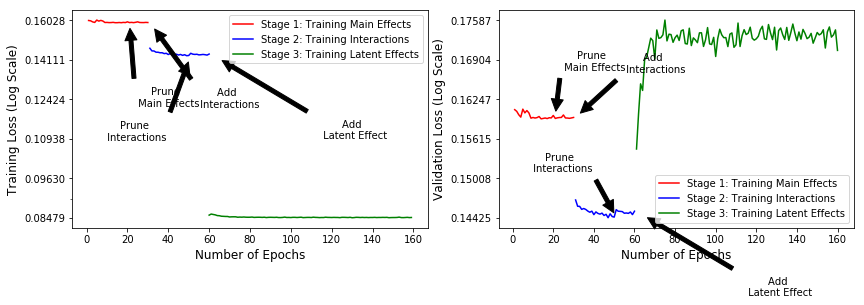

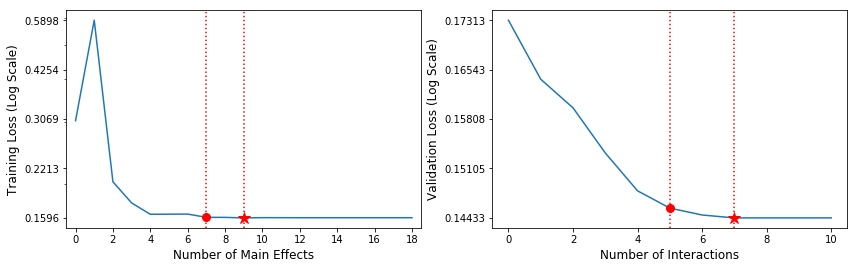

In [10]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=True, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=True, save_eps=False)

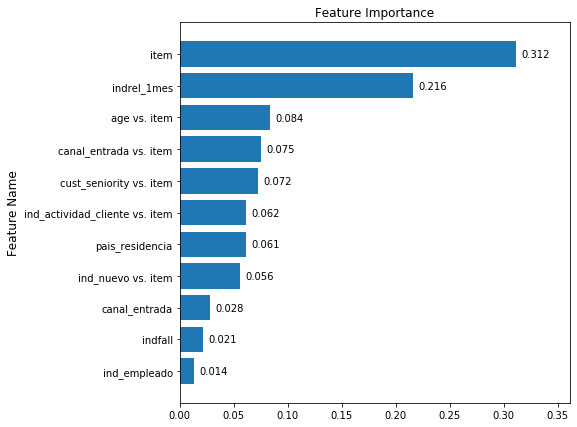

In [14]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

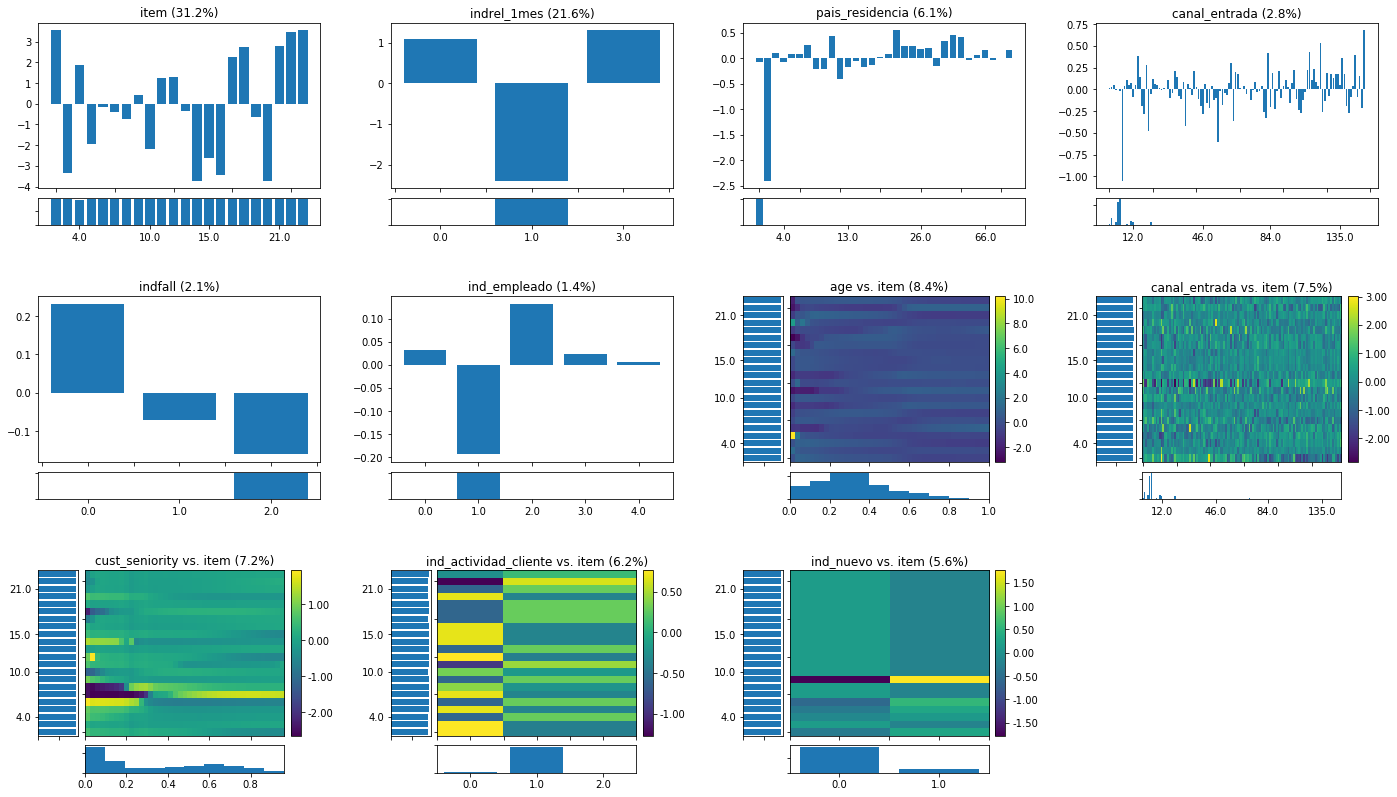

In [15]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')

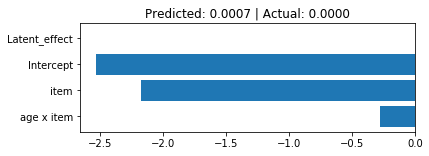

In [16]:
data_dict_local = model.local_explain(0,88,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=True, folder=simu_dir, name='s1_local')

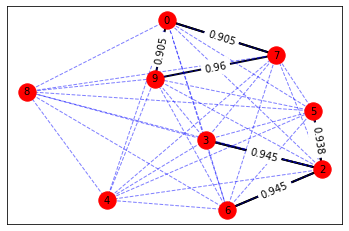

In [22]:
model.mf_distance(0.9,'user')

In [24]:
new = te_x[100,:17].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group [0]
 mean is [ 1.06259535e-04 -9.39010463e-05 -5.58286548e-05] and std is [0.00532601 0.00522245 0.00556533]
 the confidence interval is [[-0.01033272 -0.0103299  -0.01096388],[0.01054524 0.0101421  0.01085222]]


## xgboost

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop(['item'],1)
test = test.drop(['item'],1)
data,val = train_test_split(train,test_size=0.125)

x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x_t = test.iloc[:,:-1].values
y_t = test.iloc[:,-1].values

enc = MinMaxScaler()
x = enc.fit_transform(x)
x_t = enc.fit_transform(x_t)

xgb = XGBClassifier(n_jobs=-1)
xgb.fit(x,y)
pred = xgb.predict(x_t)
        
mae.append(mean_absolute_error(y_t,pred))
rmse.append(mean_squared_error(y_t,pred)**0.5)

i_result = np.array([np.mean(mae),np.mean(rmse)]).reshape(1,-1)
result = pd.DataFrame(i_result,columns=['mae','rmse'])
    
results.to_csv('result/xgboost_result.csv',index=None)

NameError: name 'mae' is not defined

In [12]:
pred = xgb.predict_proba(x_t)

In [31]:
pred.astype(int16)

NameError: name 'int16' is not defined

In [35]:
uu = []
for i in range(929615):
    pp = []
    for j in range(22):
        pp.append(pred[i*22+j])
    uu.append(np.argsort(pp)[::-1].astype(np.int8))
    

In [38]:
for j in range(22):
       pp.append(pred[i*22+j])

In [39]:
pp

[array([0.81220216, 0.18779783], dtype=float32),
 array([9.9946165e-01, 5.3835625e-04], dtype=float32),
 array([0.97521484, 0.02478513], dtype=float32),
 array([9.9972475e-01, 2.7525760e-04], dtype=float32),
 array([0.9972613, 0.0027387], dtype=float32),
 array([0.97992384, 0.02007616], dtype=float32),
 array([0.9868701 , 0.01312989], dtype=float32),
 array([0.99747264, 0.00252733], dtype=float32),
 array([0.99856603, 0.00143398], dtype=float32),
 array([0.9548916 , 0.04510835], dtype=float32),
 array([0.9586904 , 0.04130957], dtype=float32),
 array([0.9907352 , 0.00926482], dtype=float32),
 array([9.9968791e-01, 3.1206285e-04], dtype=float32),
 array([9.9968791e-01, 3.1206285e-04], dtype=float32),
 array([9.9968791e-01, 3.1206285e-04], dtype=float32),
 array([0.97217923, 0.02782076], dtype=float32),
 array([0.9793632 , 0.02063679], dtype=float32),
 array([0.9981837 , 0.00181625], dtype=float32),
 array([9.9986947e-01, 1.3051741e-04], dtype=float32),
 array([0.9967949 , 0.00320509], dt